# Maximum Likelihood estimator

# Outline

1. Introduction

2. Definition

3. Examples

# Introduction


We need to estimate a parameter from a model. Generally, we select a model — let’s say a linear regression — and use observed data X to create the model’s parameters θ.
How are the parameters actually estimated?

Let’s start with the Probability Density function (PDF) for the Normal


\begin{equation}
P(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}


Let’s say our sample is 5, what is the probability it comes from a distribution of μ = 5 and σ = 3?

In [1]:
from scipy.stats import norm
print('the probability is=',norm.pdf(5, 5, 3))

the probability is= 0.1329807601338109


What if it came from a distribution with μ = 7 and σ = 3?

In [2]:
print('the probability is=',norm.pdf(5, 7, 3))

the probability is= 0.10648266850745075


Consider this sample: x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9] and let’s compare these values to both PDF ~ N(5, 3) and PDF ~ N(7, 3). Our sample could be drawn from a variable that comes from these distributions, so let’s take a look.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

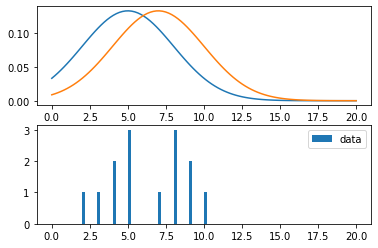

In [4]:
data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

x = np.linspace(0,20, 100)
plt.subplot(2, 1, 1)
plt.plot(x, stats.norm.pdf(x, 5, 3),label="N(5,3)")
plt.plot(x, stats.norm.pdf(x, 7, 3),label="N(7,3)")
plt.subplot(2, 1, 2)
plt.hist(data, bins=100, range=(0,20),label="data")
plt.legend()
plt.show()

Which is the value of $\mu$ and $\sigma$ that most likely give rise to our data?

# Definition

Given a data sample $X = \{x_1,x_2,\dots,x_N\}$ one applies an estimator $\hat{a}$ for the quantity $a$.
The data values $x_i$ are drawn from some probability density function $P(x,a)$ which depends on $a$. The form of $P$ is given and $a$ specified.
The probability of a data set is the product of the individual probabilities.


\begin{eqnarray*}
L(x_1,x_2,\dots,x_N;a)&=&P(x_1;a)P(x_2;a)\dots P(x_N;a)\\
&=&\Pi_i P(x_i;a)
\end{eqnarray*}

This product is called likelihood

The ML estimator for a parameter $a$ is  the procedure which evaluates the parameter value $\hat{a}$ which makes the actual observations $X$ as likely as possible, that is the set of parameters $\hat{a}$ which maximises $L(X;a)$. In practice, the logarithm of $L$  is more practical  to work with computationally (numerical stability):
\begin{eqnarray*}
\ln L(X;a)	& = & \ln \left( \prod_i P(x_i;a) \right) \\
		& = & \sum_i \ln P(x_i;a),
\end{eqnarray*}
The ML estimator $\hat{a}$ is then the value of $a$ which maximises $\ln L(X;a)$ (or minimises $-\ln L(X;a)$). This can be found (in some cases analytically) by:

\begin{eqnarray*}
\left.\frac{\mathrm{d}\,\ln L}{\mathrm{d}\,a}\right|_{a=\hat{a}}=0
\end{eqnarray*}

<img src="Barlow-5-1-ML.jpg" style="width:650px;height:650px; transform: rotate(0deg)" />

We now apply the definition of log(L) to the previous example. For simplicity we assume that $\sigma=3$ is known. 
We will see later on more complex examples

In [5]:
data=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9] 

# Compare the likelihood of the random samples to the two 
# distributions
def likelihood(mu,x):
    ll = 0
    sd=3
    for i in x:
        ll += np.log(norm.pdf(i, mu, 3))
    return ll


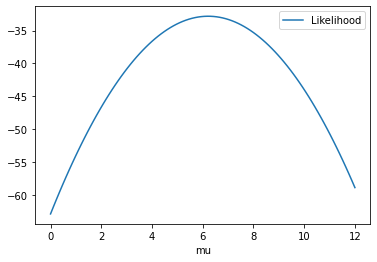

In [6]:
import numpy as np

mu = np.linspace(0,12, 100)
fun=likelihood( mu,data)

plt.plot(mu, fun,label="Likelihood")
plt.xlabel("mu")
plt.legend()
plt.show()

It is better to look for minima than for maxima so let's put a - to the likelihood



In [7]:
data=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9] 

# Compare the likelihood of the random samples to the two 
# distributions
def llog(mu,x):
    ll = 0
    sd=3
    for i in x:
        ll += -np.log(norm.pdf(i, mu, 3))
    return ll

So the routine found that the best value for mu is. actually 6.21 !!!

In [8]:
import scipy.optimize as opt

opt.fmin(llog, 1, args=(data,))

Optimization terminated successfully.
         Current function value: 32.821108
         Iterations: 21
         Function evaluations: 42


array([6.21425781])

# (Even more) Examples

# Lifetime

For decays with a lifetime $\tau$, the (normalised) probability distribution as a function of time $t$ is: $P(t;\tau)=\frac{1}{\tau}\exp(-t/\tau)$. We calculate the function $\ln L$ for this distribution in analytic way

\begin{eqnarray*}
\ln L & = & \sum_i \ln\left(\frac{1}{\tau}\exp(-t_i/\tau)\right) \\
	& = & \sum_i \left( -\ln \tau - t_i/\tau \right) \\
\end{eqnarray*}


Differentiating with respect to $\tau$ and putting to zero we obtain the estimator $\hat{\tau}$
The maximum can be found as:

\begin{equation}
\left.\frac{\mathrm{d}\,\ln L}{\mathrm{d}\,\tau}\right|_{\tau=\hat\tau} = 0 \Leftrightarrow \sum_i\left(t_i-\hat\tau\right) = 0 \Leftrightarrow \hat\tau = \frac{1}{N}\sum_i t_i 
\end{equation}
This can also be done if the time measurement is restricted, i.e.\ $P(t;\tau)$ doesn't extend to $t=\infty$, which is always the case experimentally 

# Discrete variable

Suppose that $X$ is a discrete random variable following the pdf


\begin{eqnarray}\label{pdf:ici}
P(X,\theta)=\left\{ \begin{array}{cc}
2\theta/3 & x=0\\
\theta/3 & x=1\\
2(1-\theta)/3 & x=2\\
(1-\theta)/3 & x=3
\end{array}\right.
\end{eqnarray}

where $0\le \theta \le1$.


First of all we check that the PDF is normalised

\begin{eqnarray}
\sum_i P(x_i)&=& 2\frac{\theta}{3}+\frac{\theta}{3}+\frac{2}{3}(1-\theta)+\frac{1}{3}(1-\theta)=1
\end{eqnarray}



Suppose we have the following sequence : $(3,0,2,1,3,2,1,0,2,1)$. What is the value of $\hat{\theta}$?


We calculate $\ln L$

\begin{eqnarray*}
\ln L&=& \sum_i \ln P\\
&=& \ln P(x=3)+ \ln P(x=0)+ \ln P(x=2)+ \ln P(x=1)+ \ln P(x=3)+ \ln P(x=2)\\
&&+ \ln P(x=1)+ \ln P(x=0)+ \ln P(x=2)+ \ln P(x=1)\\
\end{eqnarray*}


.... continue....
\begin{eqnarray*}
&=&2 \ln P(x=3)+3 \ln P(x=2)+3 \ln P(x=1)+2 \ln P(x=0)\\
&=&2\ln \left( \frac{2}{3}\theta\right)+3\ln \left( \frac{1}{3}\theta\right)+3\ln \left( \frac{2}{3}(1-\theta)\right)+2\ln \left( \frac{1}{3}(1-\theta)\right)\\
&=&2 \ln \frac{2}{3}+2 \ln \theta+3\ln \frac{1}{3}+3\ln \theta\\
&&+3\ln \frac{2}{3}+3\ln(1-\theta)+2\ln\frac{1}{3}+2\ln(1-\theta)
\end{eqnarray*}

We need to calculate $\frac{d \ln L}{d\theta}=0$ so all terms nodepending on $\theta$ can be neglected.

\begin{eqnarray}
\frac{d \ln L}{d\theta}=5\frac{1}{\theta}-\frac{5}{1-\theta}=0\\
1-\theta -\theta=0\\
\theta=1/2
\end{eqnarray}

# Multiple dimensions

Let's go back to the example involving the Gaussian PDF


\begin{equation}
P(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

Now assume that we want to esimtate both $\mu$ and $\sigma$ from a given data-set


In [9]:
# Same data as before

data=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9] 

We define the loglikelihood function (with the - sign!)


In [10]:
def llog2(mu,sigma,x):
    ll = 0
    sd=sigma
    for i in x:
        ll += -np.log(norm.pdf(i, mu, sd))
    return ll

In [11]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


mu = np.linspace(1,10, 100)
sigma = np.linspace(1,4, 100)

X, Y = np.meshgrid(mu, sigma)
Z = llog2(X,Y,data)

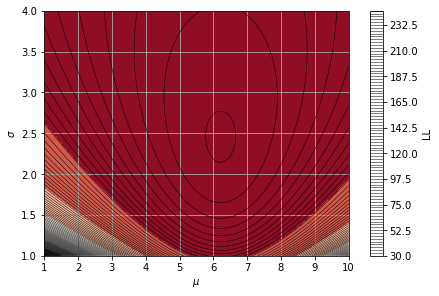

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import pylab as py

fig, ax = plt.subplots(constrained_layout=True)
levels = MaxNLocator(nbins=55).tick_values(Z.min(), Z.max())
cmap = plt.get_cmap('RdGy')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pc=ax.contourf(X,Y, Z,cmap=cmap,norm=norm)
CS = plt.contour(X,Y,Z,100,linewidths=0.5,colors='k')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('LL')

plt.ylabel('$\sigma$')
plt.xlabel('$\mu$')
ax.grid()
plt.show()

In [21]:
#WARNING: In this case I was not able to use in minimize function 
#def llog2(mu,sigma,x):
#    ll = 0
#    sd=sigma
#    for i in x:
#        ll += -np.log(norm.pdf(i, mu, sd))
#    return ll
#    
#I had to group mu and sigma into a tuple (params) and hard-code the data inside the function... if you can do better than this please correct my code

In [14]:
import scipy.optimize as opt
from scipy.stats import norm

def llog3(params):
    ll = 0
    a, b= params
    data=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9] 
    for i in data:
        ll += -np.log(norm.pdf(i, a, b))
    return ll


In [15]:
x0=[6,3]

res=opt.minimize(llog3,x0)
print(res.x)

[6.21428525 2.42541826]
